# Linear Regression via Gradient Descent

## Generate line with noise

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

/home/m/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
x = np.linspace(start=3, stop=10, num=100)
y = x + np.random.normal(loc=0, scale=1.5, size=100)

<AxesSubplot:>

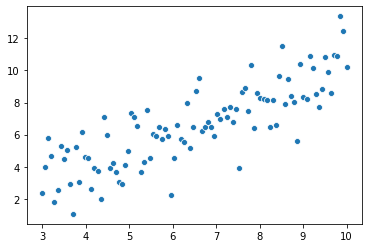

In [3]:
sns.scatterplot(x, y)

## Gradient Descent

Original Mean Squared Error(MSE) formula:  
$$MSE = \frac{1}{n} \sum \limits _{i=1} ^ {n} (y_{i} - \hat y_{i})^2$$

Substitute estimate ($\hat y_{i}$) with the equation of the regression line:  
$$f(m,c)= \frac{1}{n} \sum \limits _{i=1} ^ {n} (y_{i} - (mx_{i}+c))^2$$

### Partial derivatives:

Derivative of *f* with respect to slope (m):  
$$\frac{\partial f}{\partial m} = \frac{1}{n} \sum \limits _{i=1} ^ {n} -2 x_{i}(y_{i} - (mx_{i}+c))$$

In [4]:
D_m = lambda x, err: -2 * x.dot(err).sum() / len(x)

Derivative of *f* with respect to intercept (c):  
$$\frac{\partial f}{\partial c} = \frac{1}{n} \sum \limits _{i=1} ^ {n} -2(y_{i} - (mx_{i}+c))$$

In [5]:
D_c = lambda err: -2 * err.sum() / len(x)

In [6]:
init_rand_param = lambda: np.random.normal(loc=0, scale=2, size=1)[0]-1

In [7]:
def gradient_descent(x, y, lr=0.005, epochs=100):
    loss = []
    m, c = init_rand_param(), init_rand_param()

    for i in range(epochs):
        y_hat = m*x + c
        err = y - y_hat

        mse = 1/len(x) * (err**2).sum()
        loss.append(mse)

        slope_grad = D_m(x, err)
        intercept_grad = D_c(err)

        m -= lr * slope_grad
        c -= lr * intercept_grad    
        
    return m, c, loss

### Learned slope (m) and intercept (c)

In [8]:
%%timeit

gradient_descent(x, y)

1.11 ms ± 13.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [9]:
m, c, loss_history = gradient_descent(x, y)
m,c

(1.1360782422832456, -0.8542481344640087)

### Visualise loss

<AxesSubplot:>

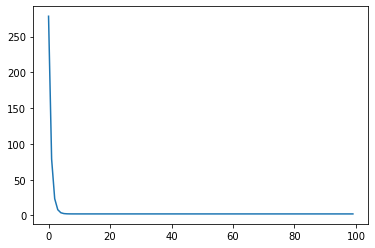

In [10]:
sns.lineplot(range(0, len(loss_history)), loss_history)

# Compare to statsmodel OLS

In [11]:
import statsmodels.api as sm

In [12]:
exog = sm.add_constant(y, prepend=False)
model = sm.OLS(x, exog)
result = model.fit()

In [13]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     204.5
Date:                Sun, 22 Nov 2020   Prob (F-statistic):           9.98e-26
Time:                        18:13:17   Log-Likelihood:                -156.88
No. Observations:                 100   AIC:                             317.8
Df Residuals:                      98   BIC:                             323.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.6615      0.046     14.302      0.000       0.570       0.753
const          2.1328      0.327      6.520      0.000       1.484       2.782
==============================================================================
Omnibus:                        0.177   Durbin-Watson:                   1.229
Prob(Omnibus):                  0.916   Jarque-Bera (JB):                0.140
Skew:                          -0.087   Prob(JB):                        0.932
Kurtosis:                       2.940   Cond. No.                         20.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Visualise orig and learned lines

In [14]:
learned_params = m*x+c
err = y - learned_params
mse = 1/len(x) * (err**2).sum()
display('Learned MSE: {}'.format(mse))

'Learned MSE: 2.144033759158421'

In [15]:
ols_params = result.params[0]*x+result.params[1]
err = y - ols_params
mse = 1/len(x) * (err**2).sum()
display('Statsmodel OLS MSE: {}'.format(mse))

'Statsmodel OLS MSE: 2.654719212941348'

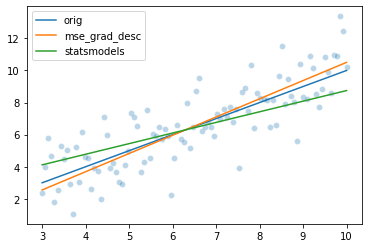

In [16]:
sns.scatterplot(x, y, alpha=0.3)

sns.lineplot(x, x, label='orig')
sns.lineplot(x, learned_params, label='mse_grad_desc')
sns.lineplot(x, ols_params, label='statsmodels')

plt.legend()
plt.show()